In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("/content/placement_data.csv")

In [4]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [5]:
df.shape

(100, 4)

In [6]:
df=df.iloc[:,1:]

In [7]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


**End to End ML steps :**
1. Preprocess + EDA + Feature Selection
2. Extract input and output cols
3. Scale the values
4. Train test split
5. Train the model
6. Evaluate the model/model selection
7. Deploy the model

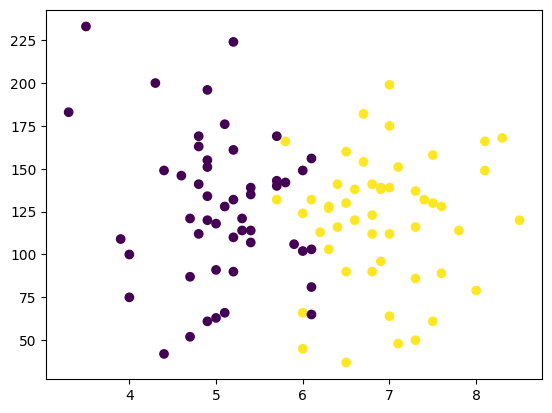

In [9]:
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])

In [11]:
x=df.iloc[:,0:2]
y=df.iloc[:,-1]
x


,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [12]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1)


In [15]:
x_train #selection random of 90 rows

,cgpa,iq
18,4.0,100.0
29,7.0,112.0
88,4.4,149.0
85,5.8,166.0
86,5.1,128.0
...,...,...
45,6.0,66.0
31,3.9,109.0
10,6.0,45.0
13,6.4,116.0


In [16]:
y_train

18    0
29    1
88    0
85    1
86    0
     ..
45    1
31    0
10    1
13    1
20    1
Name: placement, Length: 90, dtype: int64

In [17]:
x_test

,cgpa,iq
16,5.2,224.0
38,6.5,160.0
7,5.0,63.0
58,8.0,79.0
71,6.1,132.0
56,6.1,65.0
60,6.9,139.0
69,8.5,120.0
67,5.0,118.0
0,6.8,123.0


In [18]:
#scaling - all values between 0-1
from sklearn.preprocessing import StandardScaler

In [19]:
scaler=StandardScaler()

In [21]:
x_train=scaler.fit_transform(x_train)
x_train

array([[-1.72313885, -0.60778709],
       [ 0.93541823, -0.30033507],
       [-1.36866457,  0.64764199],
       [-0.1280046 ,  1.08319901],
       [-0.74833459,  0.10960095],
       [-0.92557173,  0.69888399],
       [ 1.46712965,  0.10960095],
       [-0.1280046 ,  0.46829497],
       [-1.0141903 ,  1.16006202],
       [-1.45728314,  1.95431307],
       [-0.65971602,  0.955094  ],
       [ 0.04923254,  0.00711694],
       [ 0.93541823, -1.53014315],
       [ 0.22646968, -0.27471407],
       [ 1.20127394, -0.19785107],
       [-0.92557173,  0.26332696],
       [ 0.93541823,  0.39143197],
       [-1.0141903 , -0.30033507],
       [-0.92557173, -1.60700616],
       [ 0.13785111,  0.826989  ],
       [ 1.9102225 ,  0.64764199],
       [ 0.75818109, -0.30033507],
       [ 0.49232539,  0.16084295],
       [-0.65971602, -0.86399711],
       [ 0.13785111, -1.09458612],
       [ 1.37851108,  0.878231  ],
       [ 0.31508825,  0.10960095],
       [ 0.04923254,  0.64764199],
       [-0.65971602,

In [22]:
x_test=scaler.fit_transform(x_test)
x_test

array([[-1.06415013,  2.22798743],
       [ 0.07915166,  0.82591078],
       [-1.24004271, -1.29911165],
       [ 1.39834604, -0.94859249],
       [-0.2726335 ,  0.21250224],
       [-0.2726335 , -1.25529675],
       [ 0.43093683,  0.36585438],
       [ 1.8380775 , -0.05038713],
       [-1.24004271, -0.09420203],
       [ 0.34299054,  0.01533521]])

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
clf=LogisticRegression()

In [25]:
clf.fit(x_train,y_train)

LogisticRegression()

In [26]:
y_pred=clf.predict(x_test)

In [27]:
y_test

16    0
38    1
7     0
58    1
71    1
56    0
60    1
69    1
67    0
0     1
Name: placement, dtype: int64

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
accuracy_score(y_test, y_pred)

0.8

In [31]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

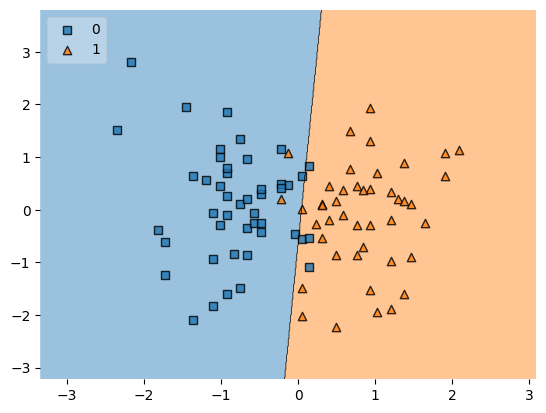

In [33]:
plot_decision_regions(x_train,y_train.values, clf=clf, legend=2)

In [ ]:
import pickle
pickle.dump(clf, open('model.pkl', 'wb'))